<a href="https://colab.research.google.com/github/jotab24/colabPython/blob/main/stock_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!pip install yfinance
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 15.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [12]:
tickername = ["BTC-USD", "COIN", "^GSPC", "MSFT", "AAPL", "O"]
startdate = "2021-1-5"
enddate = "2022-5-1"

data  = yf.download(tickername, start=startdate, end= enddate)
data .dropna()
data = data['Adj Close']
log_returns = np.log(data/data.shift())


[*********************100%***********************]  6 of 6 completed


In [13]:
log_returns.corr()

,AAPL,BTC-USD,COIN,MSFT,O,^GSPC
AAPL,1.000000,0.148312,0.319456,0.642926,0.256274,0.652485
BTC-USD,0.148312,1.000000,0.548396,0.275516,0.159559,0.331398
COIN,0.319456,0.548396,1.000000,0.316414,0.208110,0.382725
MSFT,0.642926,0.275516,0.316414,1.000000,0.295994,0.683693
O,0.256274,0.159559,0.208110,0.295994,1.000000,0.469959
^GSPC,0.652485,0.331398,0.382725,0.683693,0.469959,1.000000


In [21]:

def getTicketsAndCorrelation(t1, t2):
    df = yf.download([t1, t2], start=startdate, end= enddate)
    df.dropna()
    df = df['Adj Close']
    df = df/df.iloc[0]
    return df

def viewCorrelation(df):
    fig, ax = plt.subplots()
    df.plot(ax=ax)

[*********************100%***********************]  2 of 2 completed


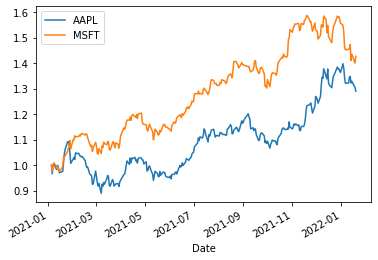

In [22]:
df = getTicketsAndCorrelation("AAPL", "MSFT")
viewCorrelation(df)